In [1]:
!pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from oura.v2 import OuraClientV2
import pandas as pd

In [3]:
client = OuraClientV2(personal_access_token="QEG7CEKQQDAOA4QICOUSREGOHEP7G3WU")
# who_am_i = client.user_info()
# test = client.sleep(start_date="2024-10-22") # keep
# test2 = client.daily_sleep(start_date="2024-10-22") # keep 

start_date = "2024-10-24"

daily_activity = client.daily_activity(start_date=start_date)
daily_readiness = client.daily_readiness(start_date=start_date)
daily_spo2 = client.daily_spo2(start_date=start_date)
daily_stress = client.daily_stress(start_date=start_date)
heartrate = client.heartrate(start_date=start_date)
personal_info = client.personal_info()
enhanced_tag = client.enhanced_tag(start_date=start_date)
rest_mode_period = client.rest_mode_period(start_date=start_date)
ring_configuration = client.ring_configuration()
session = client.session(start_date=start_date) # Keep
workouts = client.workouts(start_date=start_date)


In [4]:
# test["data"][0]

NameError: name 'test' is not defined

In [ ]:
# test2

In [5]:
daily_activity["data"][0]

{'id': '874fb60c-8ed7-42c7-9c13-11ee35e4542c',
 'class_5_min': '111111112211122112222222333343322233323322223223222232222232222222222222322222222233222322222222322222222223322223222222232323222222222222222222222332222232223223222222223322222222232232223234322222221111111111111211111111111111111111111111111111111112322212122111222222221111111111111111',
 'score': 59,
 'active_calories': 162,
 'average_met_minutes': 1.3125,
 'contributors': {'meet_daily_targets': 25,
  'move_every_hour': 95,
  'recovery_time': 100,
  'stay_active': 42,
  'training_frequency': 40,
  'training_volume': 55},
 'equivalent_walking_distance': 2996,
 'high_activity_met_minutes': 0,
 'high_activity_time': 0,
 'inactivity_alerts': 1,
 'low_activity_met_minutes': 112,
 'low_activity_time': 11100,
 'medium_activity_met_minutes': 19,
 'medium_activity_time': 300,
 'met': {'interval': 60.0,
  'items': [0.9,
   0.9,
   0.9,
   1.2,
   0.9,
   0.9,
   0.9,
   0.9,
   0.9,
   0.9,
   1.0,
   0.9,
   0.9,
   0.9,
   0.9,

In [6]:
daily_readiness["data"][0]

{'id': '17f1aa76-e27d-4d24-a7f2-0a31f2d6ee74',
 'contributors': {'activity_balance': 84,
  'body_temperature': 91,
  'hrv_balance': 65,
  'previous_day_activity': 78,
  'previous_night': 70,
  'recovery_index': 100,
  'resting_heart_rate': 100,
  'sleep_balance': 52},
 'day': '2024-10-24',
 'score': 76,
 'temperature_deviation': 0.18,
 'temperature_trend_deviation': 0.18,
 'timestamp': '2024-10-24T00:00:00+00:00'}

In [7]:
daily_spo2["data"][0]

{'id': '9147d847-fbc7-4718-961f-d21902cea3f2',
 'day': '2024-10-24',
 'spo2_percentage': {'average': 95.155},
 'breathing_disturbance_index': 2}

In [8]:
daily_stress["data"][0]

{'id': 'aac801fe-84c1-4e91-985c-be70044a29e2',
 'day': '2024-10-24',
 'stress_high': 2700,
 'recovery_high': 14400,
 'day_summary': 'restored'}

In [9]:
enhanced_tag["data"]

[]

In [20]:
ring_configuration["data"][0]

{'id': '2a6275b9-b298-4eb4-aae6-abd40675f29f',
 'color': 'glossy_black',
 'design': 'horizon',
 'firmware_version': '3.0.3',
 'hardware_type': 'gen3',
 'set_up_at': '2024-08-08T00:00:00+00:00',
 'size': 10}

In [22]:
workouts["data"][2]

{'id': 'aa451a49-9ffa-4ea2-a0a2-d50b9e921977',
 'activity': 'walking',
 'calories': None,
 'day': '2024-10-27',
 'distance': 697.452326387844,
 'end_datetime': '2024-10-27T15:21:58-04:00',
 'intensity': 'moderate',
 'label': None,
 'source': 'workout_heart_rate',
 'start_datetime': '2024-10-27T15:15:57-04:00'}

In [23]:
session["data"]

IndexError: list index out of range

In [18]:
heartrate["data"][0]

df = pd.json_normalize(heartrate["data"])
df['timestamp'] = pd.to_datetime(df["timestamp"])
df["timestamp"] = df.timestamp.dt.tz_convert('America/New_York')
df

,bpm,source,timestamp
0,69,awake,2024-10-23 20:00:11-04:00
1,67,awake,2024-10-23 20:00:12-04:00
2,71,awake,2024-10-23 20:01:56-04:00
3,68,awake,2024-10-23 20:10:11-04:00
4,71,awake,2024-10-23 20:10:12-04:00
...,...,...,...
6778,95,workout,2024-10-27 16:40:49-04:00
6779,96,workout,2024-10-27 16:40:50-04:00
6780,83,awake,2024-10-27 17:01:55-04:00
6781,79,awake,2024-10-27 17:02:34-04:00


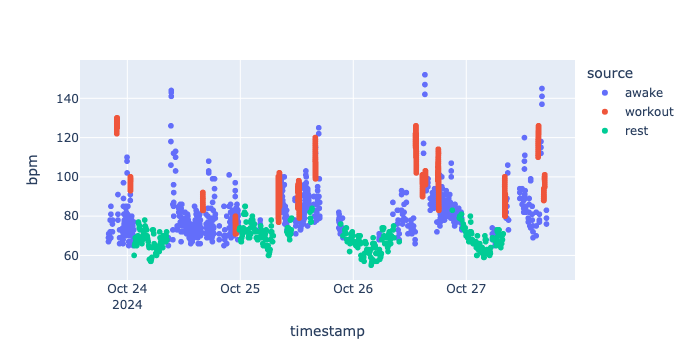

In [19]:
import plotly.express as px

fig = px.scatter(data_frame=df, x="timestamp", y="bpm", color="source")
fig.show()

In [24]:
rest_mode_period

{'data': [], 'next_token': None}